## kNN with California Housing dataset [중간 연습 답안]

### Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### California Housing dataset

* The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars.
* target값을 $100,000 기준으로 반올림하여 6개의 class로 범주화 함

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing_X = housing.data
housing_y = np.round(housing.target).astype(int) # make y discrete
housing_feature_names = housing.feature_names

print('Number of target: ',len(set(housing_y)))

# combine features and class data
housing_np = np.append(housing_X, housing_y.reshape(-1,1), axis=1)
housing_col_names = housing_feature_names + ['class']

housing_pd = pd.DataFrame(housing_np, columns=housing_col_names)
housing_pd.head(3)

Number of target:  6


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,5.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,4.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,4.0


#### train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(housing_X, housing_y, random_state=42)

#### Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
house_X_train_scale = scaler.fit_transform(housing_X_train)
house_X_test_scale = scaler.transform(housing_X_test)
pd.DataFrame(house_X_train_scale).head(3)

,0,1,2,3,4,5,6,7
0,0.305341,0.421053,0.034763,-0.810443,-0.327205,-0.339203,-0.121693,0.102902
1,0.821152,0.684211,0.703913,0.412542,-0.223821,-0.486164,0.764550,-0.915567
2,0.170889,0.368421,0.545805,0.111192,-0.486011,-0.684647,1.105820,-1.102902


* Visualization 함수

### Set parameters(n_neighbors, metric, weights)

**n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**metric**
* default='minkowski'
* The distance metric to use for the tree. 
  * 'euclidean'
  * 'manhattan'
  * 'chebyshev'
  * 'minkowski'
  * 'wminkowski'
  * 'seuclidean'
  * 'mahalanobis'

**weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 수치형 파라미터 시각화 함수
def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

# 범주형 파라미터 시각화 함수
def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

**<font color='red'>파라미터의 범위를 지정하여, test accuracy가 가장 높은 파라미터 값을 찾으시오</font>**

#### Validation_curve(n_neighbors)

##### **n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**- sklearn.model_selection.[validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) : Returns Scores on training sets and Scores on test set.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

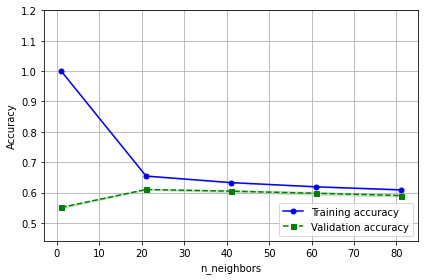

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [i for i in range(1,101,20)]
param_name='n_neighbors'

from sklearn.neighbors import KNeighborsClassifier

knn_model_k = KNeighborsClassifier()
knn_model_k.fit(house_X_train_scale, housing_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_k, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7274547803617571
* Test Accuracy(scale): 0.6085271317829457

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_k = KNeighborsClassifier(n_neighbors=23)
proper_model_k.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_k.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(n_neighbors): {}'.format(acc))

predict = proper_model_k.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(n_neighbors): {}'.format(acc))

Train Accuracy(n_neighbors): 0.6638888888888889
Test Accuracy(n_neighbors): 0.6281007751937985


#### Validation_curve(weights)

##### **weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

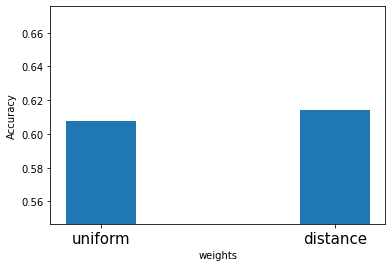

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['uniform', 'distance']
param_name='weights'

from sklearn.neighbors import KNeighborsClassifier

knn_model_w = KNeighborsClassifier(n_neighbors=23)
knn_model_w.fit(house_X_train_scale, housing_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_w, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name='weights', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous model performance**
* Train Accuracy(n_neighbors): 0.6638888888888889
* Test Accuracy(n_neighbors): 0.6281007751937985

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_w = KNeighborsClassifier(n_neighbors=23, weights='distance')
proper_model_w.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_w.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(weights): {}'.format(acc))

predict = proper_model_w.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(weights): {}'.format(acc))

Train Accuracy(weights): 1.0
Test Accuracy(weights): 0.6323643410852713


#### Validation_curve(weights)

**metric**
* default='minkowski'
* The distance metric to use for the tree. 
  * 'euclidean'
  * 'manhattan'
  * 'chebyshev'
  * 'minkowski'

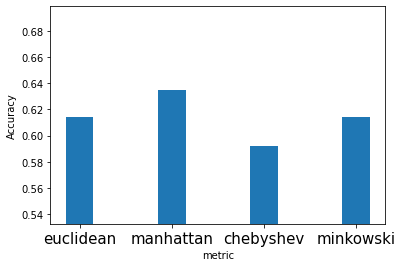

In [ ]:
from sklearn.model_selection import validation_curve

param_name= 'metric'
param_range= ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
# Dafault model
from sklearn.neighbors import KNeighborsClassifier
knn_model_m = KNeighborsClassifier(n_neighbors=23, weights='distance')

train_scores, test_scores = validation_curve(
                estimator=knn_model_m, 
                X=house_X_train_scale, 
                y=housing_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(n_neighbors): 0.6638888888888889
* Test Accuracy(n_neighbors): 0.6281007751937985

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_m = KNeighborsClassifier(n_neighbors=23, weights='distance', metric='manhattan')
proper_model_m.fit(house_X_train_scale, housing_y_train)

from sklearn import metrics

predict = proper_model_m.predict(house_X_train_scale)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(weights): {}'.format(acc))

predict = proper_model_m.predict(house_X_test_scale)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(weights): {}'.format(acc))

Train Accuracy(weights): 1.0
Test Accuracy(weights): 0.649031007751938


#### Result

* Train Accuracy(weights): 1.0
* Test Accuracy(weights): 0.649031007751938



```python
KNeighborsClassifier(n_neighbors=23, weights='distance', metric='manhattan')
```



## 1번 문제
kNN model을 사용하여 wine 데이터를 분류 하시오.
  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * n_neighbors
    * weights
    * algorithm 
    * p
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  

#### Wine dataset

```python
#load data
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine_X = wine.data
wine_y = wine.target

wine_feature_name = wine.feature_names
print('Number of targets: ',len(set(wine_y)))

pd.DataFrame(wine_X, columns=wine_feature_name).head(3)
```



## 1번 문제 답안

### Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### Wine dataset

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine_X = wine.data
wine_y = wine.target

wine_feature_name = wine.feature_names
print('Number of targets: ',len(set(wine_y)))

pd.DataFrame(wine_X, columns=wine_feature_name).head(3)

Number of targets:  3


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


### Preprocess

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X, wine_y, random_state=42)

#### Scaling 

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
wine_X_train_scale = scaler.fit_transform(wine_X_train)
wine_X_test_scale = scaler.transform(wine_X_test)
pd.DataFrame(wine_X_train_scale).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.121429,0.300654,0.939394,-0.186047,0.15,0.518182,0.654762,-0.210526,1.760563,0.305556,0.176471,0.262774,1.085106
1,-0.650000,0.117647,-2.000000,-0.441860,-0.05,0.000000,0.017857,-0.421053,-0.225352,-0.520833,0.882353,0.109489,0.074468
2,-0.407143,1.653595,1.121212,1.651163,0.20,-0.027273,-0.005952,0.473684,0.211268,-0.944444,-0.147059,0.226277,-0.659574


### Make kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_cv_scaled = KNeighborsClassifier()
knn_model_cv_scaled.fit(wine_X_train_scale, wine_y_train)

KNeighborsClassifier()

#### Evaluation

In [ ]:
from sklearn import metrics

predict = knn_model_cv_scaled.predict(wine_X_train_scale)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(scale): {}'.format(acc))

predict = knn_model_cv_scaled.predict(wine_X_test_scale)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(scale): {}'.format(acc))

Train Accuracy(scale): 0.9849624060150376
Test Accuracy(scale): 0.9333333333333333


### Set Hyperparameter(n_neighbors, weights, algorithm, p)

#### Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(n_neighbors)

##### **n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**- sklearn.model_selection.[validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) : Returns Scores on training sets and Scores on test set.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

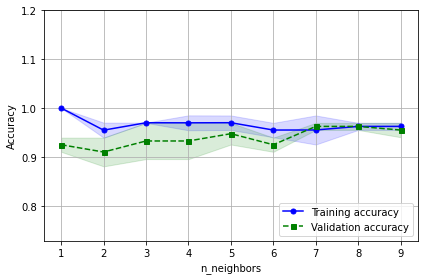

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [i for i in range(1, 10)]
param_name='n_neighbors'

from sklearn.neighbors import KNeighborsClassifier

knn_model_k = KNeighborsClassifier()
knn_model_k.fit(wine_X_train_scale, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_k, 
                X=wine_X_train_scale, 
                y=wine_y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.9849624060150376
* Test Accuracy(scale): 0.9333333333333333

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_k = KNeighborsClassifier(n_neighbors=7)
proper_model_k.fit(wine_X_train_scale, wine_y_train)

from sklearn import metrics

predict = proper_model_k.predict(wine_X_train_scale)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(n_neighbors): {}'.format(acc))

predict = proper_model_k.predict(wine_X_test_scale)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(n_neighbors): {}'.format(acc))

Train Accuracy(n_neighbors): 0.9699248120300752
Test Accuracy(n_neighbors): 0.9555555555555556


#### Validation_curve(p)

##### **p**
* int, default=2
* Power parameter for the Minkowski metric
  * p = 1: this is equivalent to using manhattan_distance (l1)
  * p = 2: euclidean_distance (l2)

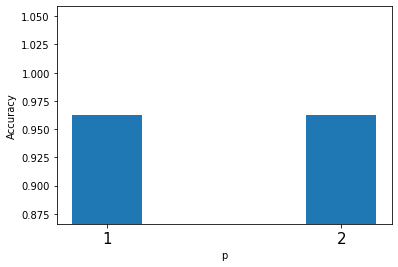

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [1, 2]
param_name='p'
from sklearn.neighbors import KNeighborsClassifier

knn_model_p = KNeighborsClassifier(n_neighbors=7)
knn_model_p.fit(wine_X_train_scale, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_p, 
                X=wine_X_train_scale, 
                y=wine_y_train, 
                param_name='p', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best model performance**
* Train Accuracy(n_neighbors): 1.0
* Test Accuracy(n_neighbors): 0.9555555555555556

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_p = KNeighborsClassifier(n_neighbors=7, p=1)
proper_model_p.fit(wine_X_train_scale, wine_y_train)

from sklearn import metrics

predict = proper_model_p.predict(wine_X_train_scale)
acc = metrics.accuracy_score(wine_y_train, predict)
print('Train Accuracy(p): {}'.format(acc))

predict = proper_model_p.predict(wine_X_test_scale)
acc = metrics.accuracy_score(wine_y_test, predict)
print('Test Accuracy(p): {}'.format(acc))

Train Accuracy(p): 0.9849624060150376
Test Accuracy(p): 0.9777777777777777


#### Validation_curve(algorithm)

##### **algorithm**
* default='auto'
* Algorithm used to compute the nearest neighbors
  * 'ball_tree'
  * 'kd_tree'
  * 'brute': will use a brute-force search.
  * 'auto': will attempt to decide the most appropriate algorithm based on the values passed to fit method.

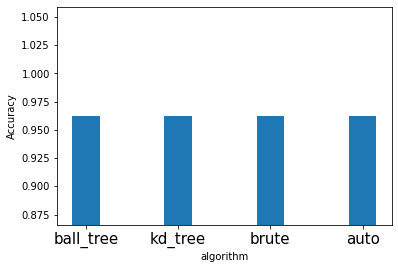

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['ball_tree', 'kd_tree', 'brute', 'auto']
param_name='algorithm'

from sklearn.neighbors import KNeighborsClassifier

knn_model_a = KNeighborsClassifier(n_neighbors=7, p=1)
knn_model_a.fit(wine_X_train_scale, wine_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_a, 
                X=wine_X_train_scale, 
                y=wine_y_train, 
                param_name='algorithm', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Result
**Best model performance**
* Train Accuracy(p): 0.9849624060150376
* Test Accuracy(p): 0.9777777777777777



```python
KNeighborsClassifier(n_neighbors=7, p=1)
```



## 2번 문제

kNN model을 사용하여 breast cancer 데이터를 분류 하시오.
  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * n_neighbors
    * weights
    * algorithm 
    * p
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

## 2번 문제 답안

### Setup

In [ ]:
# Common imports
import sklearn
import numpy as np

### Datasets

#### Breast cancer dataset
* The breast cancer dataset is a classic and very easy binary classification dataset.

In [ ]:
from sklearn import datasets
import pandas as pd

breast = datasets.load_breast_cancer()
breast_X = breast["data"]
breast_y = breast["target"]
breast_feature_name = breast.feature_names

pd.DataFrame(breast_X, columns=breast_feature_name).head(5)

### Preprocess

#### Splitting

In [ ]:
from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(breast_X, breast_y, random_state=42)

#### Scaling 
##### RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
breast_X_train_scale = scaler.fit_transform(breast_X_train)
breast_X_test_scale = scaler.transform(breast_X_test)
pd.DataFrame(breast_X_train_scale).head(3)

### Make kNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_bc_scaled = KNeighborsClassifier()
knn_model_bc_scaled.fit(covtype_X_train_scale, covtype_y_train)

#### Evaluation
**Default model performance**
* Train Accuracy(house): 0.5735788113695091
* Test Accuracy(house): 0.3953488372093023

In [ ]:
from sklearn import metrics

predict = knn_model_bc_scaled.predict(breast_X_train_scale)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(scale): {}'.format(acc))

predict = knn_model_bc_scaled.predict(breast_X_test_scale)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(scale): {}'.format(acc))

### Set Hyperparameter(n_neighbors, weights, algorithm, p)

#### Visualization 함수

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(n_neighbors)

##### **n_neighbors**
* int, default=5
* Number of neighbors to use by default for kneighbors queries

**- sklearn.model_selection.[validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) : Returns Scores on training sets and Scores on test set.**

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified parameter. This is similar to grid search with one parameter. However, this will also compute training scores and is merely a utility for plotting the results.

In [ ]:
from sklearn.model_selection import validation_curve
param_range= [i for i in range(1,101,20)]
param_name='n_neighbors'

from sklearn.neighbors import KNeighborsClassifier

knn_model_k = KNeighborsClassifier()
knn_model_k.fit(breast_X_train_scale, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_k, 
                X=breast_X_train_scale, 
                y=breast_y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best performance**
* Train Accuracy(scale): 0.7274547803617571
* Test Accuracy(scale): 0.6085271317829457

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_k = KNeighborsClassifier(n_neighbors=23)
proper_model_k.fit(breast_X_train_scale, breast_y_train)

from sklearn import metrics

predict = proper_model_k.predict(breast_X_train_scale)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(n_neighbors): {}'.format(acc))

predict = proper_model_k.predict(breast_X_test_scale)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(n_neighbors): {}'.format(acc))

#### Validation_curve(weights)

##### **weights**
* default='uniform'
* Weight function used in prediction. 
  * 'uniform': uniform weights. All points in each neighborhood are weighted equally.
  * 'distance': weight points by the inverse of their distance
  * [callable]: a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['uniform', 'distance']
param_name='weights'

from sklearn.neighbors import KNeighborsClassifier

knn_model_w = KNeighborsClassifier(n_neighbors=23)
knn_model_w.fit(breast_X_train_scale, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_w, 
                X=breast_X_train_scale, 
                y=breast_y_train, 
                param_name='weights', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best model performance**
* Train Accuracy(n_neighbors): 0.6638888888888889
* Test Accuracy(n_neighbors): 0.6281007751937985

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_w = KNeighborsClassifier(n_neighbors=23, weights='distance')
proper_model_w.fit(breast_X_train_scale, breast_y_train)

from sklearn import metrics

predict = proper_model_w.predict(breast_X_train_scale)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(weights): {}'.format(acc))

predict = proper_model_w.predict(breast_X_test_scale)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(weights): {}'.format(acc))

#### Validation_curve(p)

##### **p**
* int, default=2
* Power parameter for the Minkowski metric
  * p = 1: this is equivalent to using manhattan_distance (l1)
  * p = 2: euclidean_distance (l2)

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [1, 2]
param_name='p'
from sklearn.neighbors import KNeighborsClassifier

knn_model_p = KNeighborsClassifier(n_neighbors=23, weights='distance')
knn_model_p.fit(breast_X_train_scale, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_p, 
                X=breast_X_train_scale, 
                y=breast_y_train, 
                param_name='p', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Previous Best model performance**
* Train Accuracy(weights): 1.0
* Test Accuracy(weights): 0.6323643410852713

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

proper_model_p = KNeighborsClassifier(n_neighbors=23, weights='distance', p=1)
proper_model_p.fit(breast_X_train_scale, breast_y_train)

from sklearn import metrics

predict = proper_model_p.predict(breast_X_train_scale)
acc = metrics.accuracy_score(breast_y_train, predict)
print('Train Accuracy(p): {}'.format(acc))

predict = proper_model_p.predict(breast_X_test_scale)
acc = metrics.accuracy_score(breast_y_test, predict)
print('Test Accuracy(p): {}'.format(acc))

#### Validation_curve(algorithm)

##### **algorithm**
* default='auto'
* Algorithm used to compute the nearest neighbors
  * 'ball_tree'
  * 'kd_tree'
  * 'brute': will use a brute-force search.
  * 'auto': will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [ ]:
from sklearn.model_selection import validation_curve
param_range = ['ball_tree', 'kd_tree', 'brute', 'auto']
param_name='algorithm'

from sklearn.neighbors import KNeighborsClassifier

knn_model_a = KNeighborsClassifier(n_neighbors=23, weights='distance', p=1)
knn_model_a.fit(breast_X_train_scale, breast_y_train)

train_scores, test_scores = validation_curve(
                estimator=knn_model_a, 
                X=breast_X_train_scale, 
                y=breast_y_train, 
                param_name='algorithm', 
                param_range=param_range,
                cv=2)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Result
**Best model performance**
* Train Accuracy(p): 1.0
* Test Accuracy(p): 0.649031007751938



```python
KNeighborsClassifier(n_neighbors=23, weights='distance', p=1)
```

